<a href="https://colab.research.google.com/github/abdelrhman-5/depi/blob/main/Overnight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adeniranstephen/obesity-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/obesity-prediction-dataset


In [2]:
ls /root/.cache/kagglehub/datasets/adeniranstephen/obesity-prediction-dataset/versions/1

ObesityDataSet_raw_and_data_sinthetic.csv


In [35]:
path = "/root/.cache/kagglehub/datasets/adeniranstephen/obesity-prediction-dataset/versions/1/ObesityDataSet_raw_and_data_sinthetic.csv"
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report


In [4]:
df = pd.read_csv(path)
df.sample(20)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
887,Male,19,1.81,86.14,yes,yes,2.64,3.82,Sometimes,no,2.40,no,2.04,0.472,Sometimes,Public_Transportation,Overweight_Level_I
1837,Female,21,1.81,138.73,yes,yes,3.00,3.00,Sometimes,no,2.64,no,0.48,0.735,Sometimes,Public_Transportation,Obesity_Type_III
1753,Male,28,1.81,120.42,yes,yes,2.97,3.00,Sometimes,no,2.57,no,0.69,1.340,Sometimes,Public_Transportation,Obesity_Type_II
945,Male,23,1.70,75.00,yes,yes,2.16,3.00,Sometimes,no,2.15,no,1.08,1.503,Sometimes,Public_Transportation,Overweight_Level_I
905,Male,20,1.85,85.23,yes,yes,2.15,3.00,Sometimes,no,2.10,no,1.17,0.834,Sometimes,Public_Transportation,Overweight_Level_I
1068,Male,22,1.66,80.00,yes,yes,2.00,3.00,Sometimes,no,2.00,no,2.94,1.692,no,Public_Transportation,Overweight_Level_II
359,Female,33,1.56,48.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,1.00,0.000,Sometimes,Public_Transportation,Normal_Weight
180,Female,18,1.58,48.00,no,yes,2.00,3.00,Sometimes,no,2.00,no,1.00,0.000,no,Public_Transportation,Normal_Weight
177,Male,22,1.84,84.00,yes,yes,3.00,3.00,Frequently,no,2.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
1611,Male,25,1.83,120.98,yes,yes,2.64,3.00,Sometimes,no,2.74,no,2.00,0.501,Sometimes,Public_Transportation,Obesity_Type_II


In [5]:
df["CALC"].unique()
df["MTRANS"].unique()
df['CAEC'].unique()
print(df["CALC"].unique())
print(df["MTRANS"].unique())
print(df['CAEC'].unique())

['no' 'Sometimes' 'Frequently' 'Always']
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
['Sometimes' 'Frequently' 'Always' 'no']


In [6]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [7]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   int64  
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [9]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
df.duplicated().sum()

np.int64(24)

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
catigorical_cols = df.select_dtypes(include=['object']).columns

In [13]:
corr = df[numerical_cols].corr()
corr

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.031551,0.199063,0.014309,-0.055821,-0.044342,-0.148341,-0.302599
Height,-0.031551,1.000000,0.456591,-0.040820,0.227539,0.220572,0.294235,0.041486
Weight,0.199063,0.456591,1.000000,0.216720,0.092092,0.203790,-0.056408,-0.079361
FCVC,0.014309,-0.040820,0.216720,1.000000,0.034712,0.081268,0.021999,-0.104213
NCP,-0.055821,0.227539,0.092092,0.034712,1.000000,0.075176,0.127831,0.015775
CH2O,-0.044342,0.220572,0.203790,0.081268,0.075176,1.000000,0.165254,0.020662
FAF,-0.148341,0.294235,-0.056408,0.021999,0.127831,0.165254,1.000000,0.058740
TUE,-0.302599,0.041486,-0.079361,-0.104213,0.015775,0.020662,0.058740,1.000000


In [14]:
df['Height'] = df['Height'] * 0.393701
df['Weight'] = df['Weight'] * 2.20462
df['BMI'] = (df['Weight'] * 703) / (df['Height'] ** 2)

print("Summary of new BMI:")
print(df[['Height', 'Weight', 'BMI']].describe())

Summary of new BMI:
            Height       Weight            BMI
count  2087.000000  2087.000000    2087.000000
mean      0.670322   191.490441  297658.764531
std       0.036713    57.740846   80288.119794
min       0.570866    85.980180  129969.820720
25%       0.641733   145.504920  243664.301058
50%       0.669292   183.203922  288586.699057
75%       0.696851   238.132029  360661.073893
max       0.779528   381.399260  508117.889805


In [15]:
cols_to_drop = ["Weight", "Height"]
df = df.drop(columns=cols_to_drop)

In [16]:
numerical_cols1 = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols1

Index(['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'BMI'], dtype='object')

In [17]:
category_score_map = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
df['Weight_Score'] = df['NObeyesdad'].map(category_score_map)

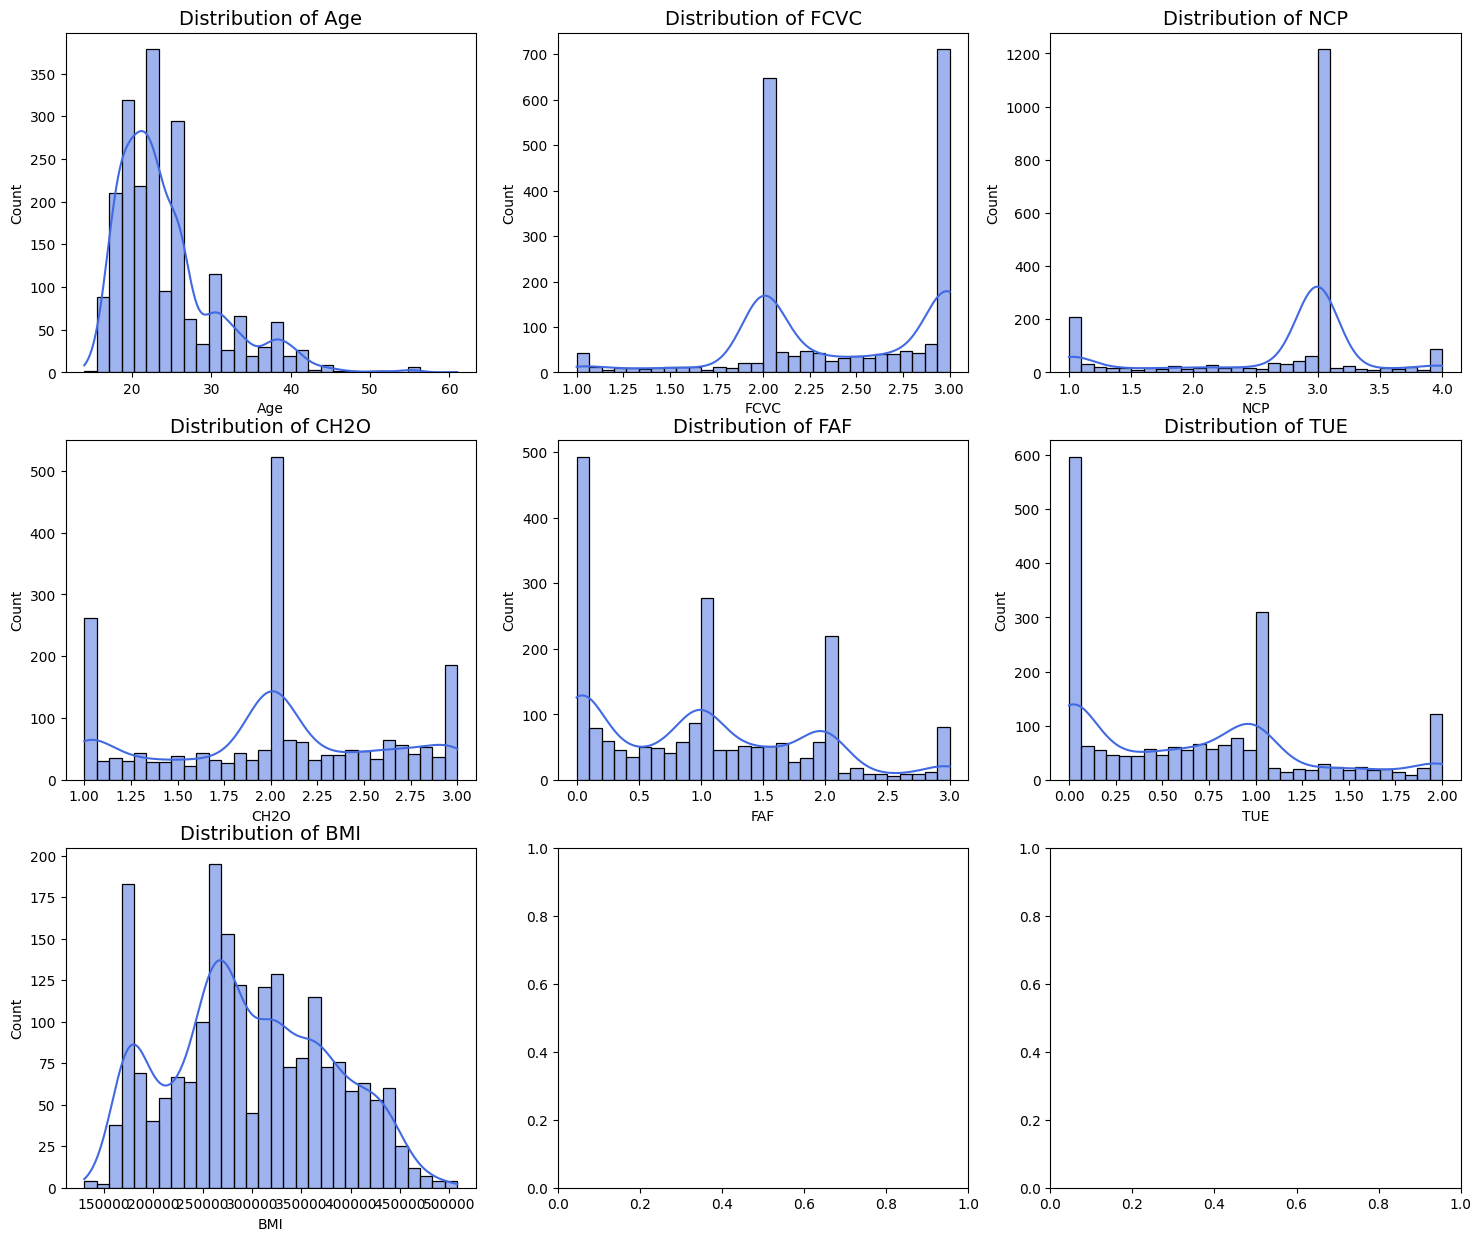

In [18]:
#Histograms for Numeric Columns
num_cols = len(numerical_cols1)
num_rows = math.ceil(num_cols / 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(18, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols1):
    sns.histplot(df[col], kde=True, bins=30, color='royalblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)

In [19]:
df['Weight_Score'].value_counts(normalize=True)

,proportion
Weight_Score,
4,0.168184
6,0.155247
5,0.142310
3,0.138955
1,0.135122
2,0.132247
0,0.127935


In [20]:
df['Gender'].value_counts()

,count
Gender,
Male,1052
Female,1035


In [21]:
# Compute Mutual Information
mi_scores = mutual_info_classif(df[numerical_cols1], df['Weight_Score'], discrete_features=False)

# Create a DataFrame to display results
mi_results = pd.DataFrame({'Feature': numerical_cols1, 'MI Score': mi_scores})

# Sort features by importance
mi_results = mi_results.sort_values(by='MI Score', ascending=False)

# Display results
print("Selected Features based on Mutual Information:")
print(mi_results)

Selected Features based on Mutual Information:
  Feature  MI Score
6     BMI  1.821923
0     Age  0.394322
1    FCVC  0.383892
3    CH2O  0.280955
5     TUE  0.273320
4     FAF  0.266526
2     NCP  0.248912


<ipython-input-22-46951186bd31>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MI Score', y='Feature', data=mi_results, palette='Blues')


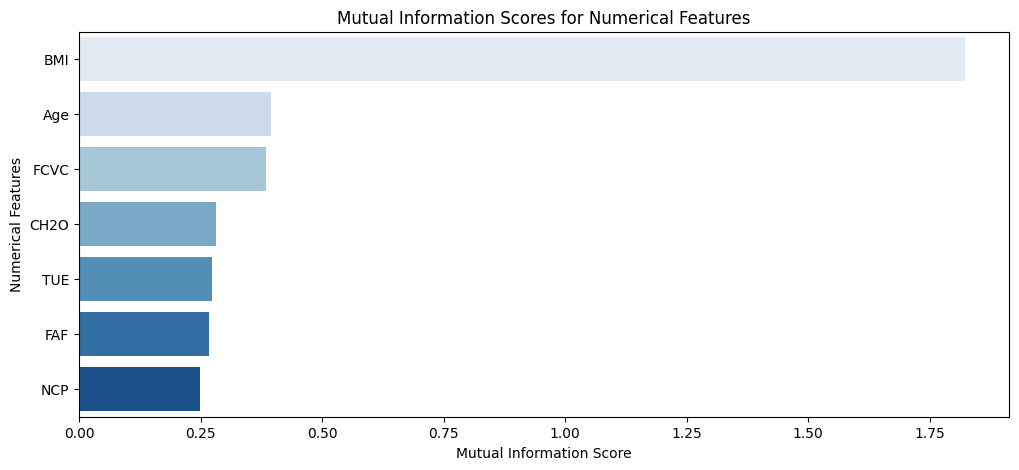

In [22]:
# Plot Mutual Information Scores
plt.figure(figsize=(12, 5))
sns.barplot(x='MI Score', y='Feature', data=mi_results, palette='Blues')
plt.xlabel('Mutual Information Score')
plt.ylabel('Numerical Features')
plt.title('Mutual Information Scores for Numerical Features')
plt.show()

In [23]:
catigorical_cols

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [24]:
df['Gender'] = df['Gender'].astype(bool).astype(int)
df['family_history_with_overweight'] = df['family_history_with_overweight'].astype(bool).astype(int)
df['FAVC'] = df['FAVC'].astype(bool).astype(int)
df['SMOKE'] = df['SMOKE'].astype(bool).astype(int)
df['SCC'] = df['SCC'].astype(bool).astype(int)

In [25]:
df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,Weight_Score
0,1,21,1,1,2.0,3.0,Sometimes,1,2.00,1,0.00,1.000,no,Public_Transportation,Normal_Weight,243840.576855,1
1,1,21,1,1,3.0,3.0,Sometimes,1,3.00,1,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight,242357.734012,1
2,1,23,1,1,2.0,3.0,Sometimes,1,2.00,1,2.00,1.000,Frequently,Public_Transportation,Normal_Weight,237630.262163,1
3,1,27,1,1,3.0,3.0,Sometimes,1,2.00,1,2.00,0.000,Frequently,Walking,Overweight_Level_I,268491.335172,2
4,1,22,1,1,2.0,1.0,Sometimes,1,2.00,1,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II,283395.117848,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,21,1,1,3.0,3.0,Sometimes,1,1.73,1,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III,449357.740057,6
2107,1,22,1,1,3.0,3.0,Sometimes,1,2.01,1,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III,436657.831489,6
2108,1,23,1,1,3.0,3.0,Sometimes,1,2.05,1,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III,436494.582711,6
2109,1,24,1,1,3.0,3.0,Sometimes,1,2.85,1,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III,440403.290973,6


In [26]:
frequency_map = {
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
}

transport_map = {
    'Public_Transportation': 0,
    'Walking': 1,
    'Bike': 2,
    'Motorbike': 3,
    'Automobile': 4
}
df['CALC_score'] = df['CALC'].map(frequency_map)
df['CAEC_score'] = df['CAEC'].map(frequency_map)
df['MTRANS_score'] = df['MTRANS'].map(transport_map)

In [27]:
stand_cat = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CALC_score', 'CAEC_score', 'MTRANS_score']
# Target Variable
y = df['Weight_Score']

X = df[stand_cat]
chi2_scores, p_values = chi2(X, y)

# Store results in a DataFrame
chi2_results = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': chi2_scores, 'p-value': p_values})

# Select features with p-value < 0.05 (statistically significant)
selected_features = chi2_results[chi2_results['p-value'] < 0.05]

In [28]:
# Display results
print("Selected Features based on Chi-Square Test:")
print(selected_features)

Selected Features based on Chi-Square Test:
        Feature  Chi2 Score       p-value
5    CALC_score   67.353136  1.425133e-12
6    CAEC_score   70.244198  3.643468e-13
7  MTRANS_score  453.939171  6.967766e-95


<ipython-input-29-f37502ea581c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Chi2 Score', y='Feature', data=selected_features, palette='Oranges')


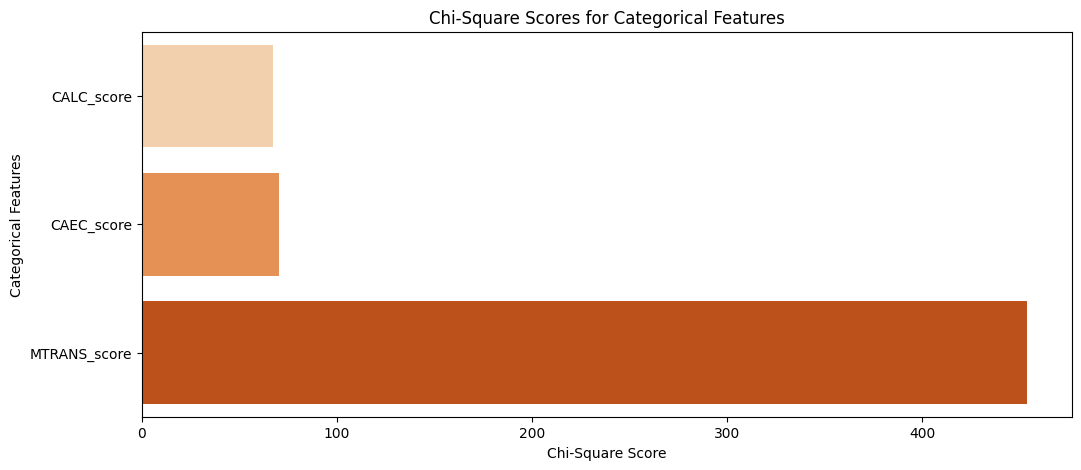

In [29]:
# Plot Chi-Square Scores
plt.figure(figsize=(12, 5))
sns.barplot(x='Chi2 Score', y='Feature', data=selected_features, palette='Oranges')
plt.xlabel('Chi-Square Score')
plt.ylabel('Categorical Features')
plt.title('Chi-Square Scores for Categorical Features')
plt.show()

In [30]:
df

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI,Weight_Score,CALC_score,CAEC_score,MTRANS_score
0,1,21,1,1,2.0,3.0,Sometimes,1,2.00,1,0.00,1.000,no,Public_Transportation,Normal_Weight,243840.576855,1,0,1,0
1,1,21,1,1,3.0,3.0,Sometimes,1,3.00,1,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight,242357.734012,1,1,1,0
2,1,23,1,1,2.0,3.0,Sometimes,1,2.00,1,2.00,1.000,Frequently,Public_Transportation,Normal_Weight,237630.262163,1,2,1,0
3,1,27,1,1,3.0,3.0,Sometimes,1,2.00,1,2.00,0.000,Frequently,Walking,Overweight_Level_I,268491.335172,2,2,1,1
4,1,22,1,1,2.0,1.0,Sometimes,1,2.00,1,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II,283395.117848,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,21,1,1,3.0,3.0,Sometimes,1,1.73,1,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III,449357.740057,6,1,1,0
2107,1,22,1,1,3.0,3.0,Sometimes,1,2.01,1,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III,436657.831489,6,1,1,0
2108,1,23,1,1,3.0,3.0,Sometimes,1,2.05,1,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III,436494.582711,6,1,1,0
2109,1,24,1,1,3.0,3.0,Sometimes,1,2.85,1,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III,440403.290973,6,1,1,0


In [33]:
df_model = df.drop(columns=['CALC','CAEC','MTRANS','NObeyesdad'])

In [36]:
standardscaler = StandardScaler()
df_model[['Age', 'BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']] = standardscaler.fit_transform(df_model[['Age', 'BMI', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']])
model = DecisionTreeClassifier()
y = df_model['Weight_Score']
x = df_model.drop(columns=['Weight_Score'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
y_pred_dt = model.predict(x_test)
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_dt

array([[57,  1,  1,  0,  0,  0,  0],
       [ 1, 59,  1,  0,  0,  0,  0],
       [ 0,  1, 47,  7,  0,  0,  0],
       [ 0,  0,  1, 48,  0,  0,  0],
       [ 0,  0,  0,  1, 67,  2,  0],
       [ 0,  0,  0,  0,  2, 61,  1],
       [ 0,  0,  0,  0,  0,  0, 60]])

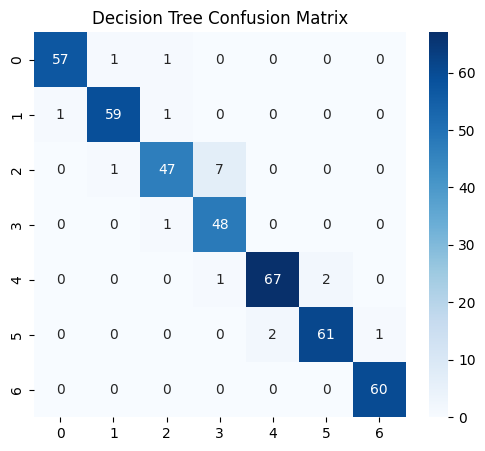

In [45]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [46]:
classification_report(y_test, y_pred_dt)

'              precision    recall  f1-score   support\n\n           0       0.98      0.97      0.97        59\n           1       0.97      0.97      0.97        61\n           2       0.94      0.85      0.90        55\n           3       0.86      0.98      0.91        49\n           4       0.97      0.96      0.96        70\n           5       0.97      0.95      0.96        64\n           6       0.98      1.00      0.99        60\n\n    accuracy                           0.95       418\n   macro avg       0.95      0.95      0.95       418\nweighted avg       0.96      0.95      0.95       418\n'

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        59
           1       0.97      0.97      0.97        61
           2       0.94      0.85      0.90        55
           3       0.86      0.98      0.91        49
           4       0.97      0.96      0.96        70
           5       0.97      0.95      0.96        64
           6       0.98      1.00      0.99        60

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.96      0.95      0.95       418


In [47]:
accuracy_score(y_test, y_pred_dt)

0.9545454545454546